In [1]:
%pylab inline
import terrainy
import geopandas as gpd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

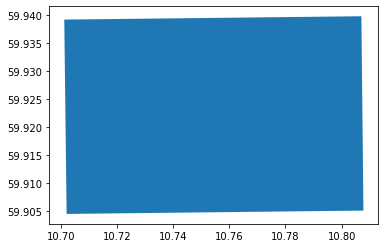

In [2]:
df = gpd.read_file("small.shp").to_crs("EPSG:4326")
df.plot()

In [3]:
data = terrainy.getMaps(df)
data

,country,type,resolution_m,crs_orig,connection_args,connection_type,source,layer,geometry
title,,,,,,,,,
Norway DTM,Norway,DTM,1,EPSG:25833,{'url': 'https://wcs.geonorge.no/skwms1/wcs.ho...,wcs,https://kartkatalog.geonorge.no/metadata/nasjo...,dtm_25833,"POLYGON ((9.66888 58.60331, 9.53165 58.52364, ..."
Norway DEM,Norway,DEM,1,EPSG:25833,{'url': 'https://wcs.geonorge.no/skwms1/wcs.ho...,wcs,https://kartkatalog.geonorge.no/metadata/nasjo...,dom_25833,"POLYGON ((9.66888 58.60331, 9.53165 58.52364, ..."


In [18]:
from owslib.wcs import WebCoverageService
con = WebCoverageService(**data.iloc[0]["connection_args"])

In [21]:
layer = con["dtm_25833"]

In [22]:
con.getDescribeCoverage()

In [4]:
data_dict = terrainy.download(df, "Norway DTM", 1)

Working on block 1,1 of 6,5
Working on block 1,2 of 6,5
Working on block 1,3 of 6,5
Working on block 1,4 of 6,5
Working on block 1,5 of 6,5
Working on block 2,1 of 6,5
Working on block 2,2 of 6,5
Working on block 2,3 of 6,5
Working on block 2,4 of 6,5
Working on block 2,5 of 6,5
Working on block 3,1 of 6,5
Working on block 3,2 of 6,5
Working on block 3,3 of 6,5
Working on block 3,4 of 6,5
Working on block 3,5 of 6,5
Working on block 4,1 of 6,5
Working on block 4,2 of 6,5
Working on block 4,3 of 6,5
Working on block 4,4 of 6,5
Working on block 4,5 of 6,5
Working on block 5,1 of 6,5
Working on block 5,2 of 6,5
Working on block 5,3 of 6,5
Working on block 5,4 of 6,5
Working on block 5,5 of 6,5
Working on block 6,1 of 6,5
Working on block 6,2 of 6,5
Working on block 6,3 of 6,5
Working on block 6,4 of 6,5
Working on block 6,5 of 6,5


In [10]:
terrainy.export(data_dict, "small.tif")

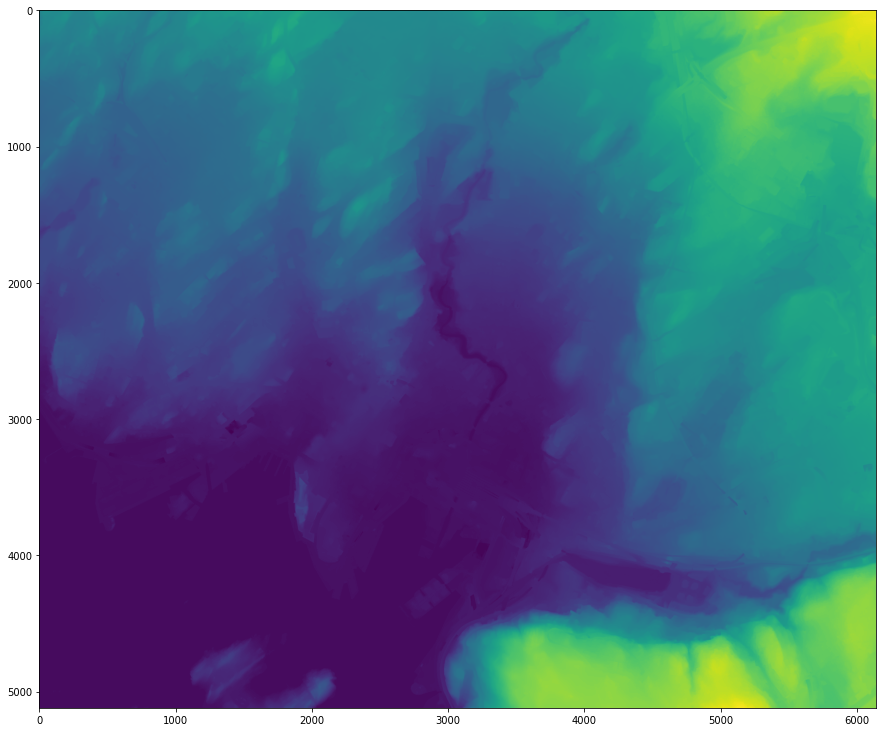

In [11]:
plt.figure(figsize=(15, 15))
plt.imshow(data_dict["array"][0,:,:])
plt.show()

In [12]:
terrainy.terrainy_shp.loc["HR_losmasse"] = {"connection_args": {"url": "https://mapproxy.emrld.no/service?REQUEST=GetCapabilities",
                                                },
                                            "layer": "HR_losmasse",

                                            "connection_type": "wms",
                           "crs_orig": 3857
                            }

In [13]:
data_dict_img = terrainy.download(df, "HR_losmasse", 1)


Working on block 1,1 of 12,8
Working on block 1,2 of 12,8
Working on block 1,3 of 12,8
Working on block 1,4 of 12,8
Working on block 1,5 of 12,8
Working on block 1,6 of 12,8
Working on block 1,7 of 12,8
Working on block 1,8 of 12,8
Working on block 2,1 of 12,8
Working on block 2,2 of 12,8
Working on block 2,3 of 12,8
Working on block 2,4 of 12,8
Working on block 2,5 of 12,8
Working on block 2,6 of 12,8
Working on block 2,7 of 12,8
Working on block 2,8 of 12,8
Working on block 3,1 of 12,8
Working on block 3,2 of 12,8
Working on block 3,3 of 12,8
Working on block 3,4 of 12,8
Working on block 3,5 of 12,8
Working on block 3,6 of 12,8
Working on block 3,7 of 12,8
Working on block 3,8 of 12,8
Working on block 4,1 of 12,8
Working on block 4,2 of 12,8
Working on block 4,3 of 12,8
Working on block 4,4 of 12,8
Working on block 4,5 of 12,8
Working on block 4,6 of 12,8
Working on block 4,7 of 12,8
Working on block 4,8 of 12,8
Working on block 5,1 of 12,8
Working on block 5,2 of 12,8
Working on blo

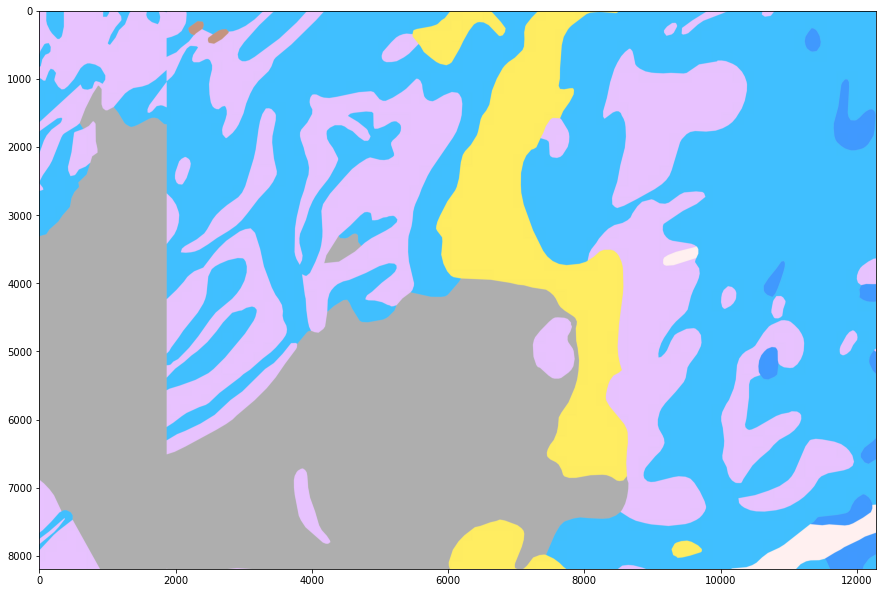

In [14]:
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(data_dict_img["array"], (1, 2, 0)))
plt.show()

In [15]:
terrainy.export(data_dict_img, "small_image.tif")